In [151]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape
import matplotlib.pyplot as plt

In [152]:
inputs = []
targets = []

In [153]:
for i in range(50):
    with open('dataset.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['roi']
        targets = targets + data['peak']

In [154]:
inputs = np.array(inputs)
targets = np.array(targets)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [156]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(20, 1)

In [157]:
model = Sequential()

model.add(Input(shape=input_shape))
model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [158]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [159]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_37 (Conv1D)                   │ (None, 18, 20)              │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_38 (Conv1D)                   │ (None, 16, 16)              │             976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 14, 8)               │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 16)                  │           1,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,433 (13.41 KB)

 Trainable params: 3,433 (13.41 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100)

Epoch 1/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - binary_accuracy: 0.8639 - loss: 0.2972 - val_binary_accuracy: 0.9408 - val_loss: 0.1432
Epoch 2/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9439 - loss: 0.1393 - val_binary_accuracy: 0.9433 - val_loss: 0.1265
Epoch 3/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9542 - loss: 0.1141 - val_binary_accuracy: 0.9553 - val_loss: 0.1011
Epoch 4/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9615 - loss: 0.0982 - val_binary_accuracy: 0.9682 - val_loss: 0.0860
Epoch 5/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9658 - loss: 0.0834 - val_binary_accuracy: 0.9788 - val_loss: 0.0658
Epoch 6/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9712 - loss: 0.0744 - val_binary_accuracy: 0.9751 - val_loss: 0.0711
Epoch 7/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9776 - loss: 0.0597 - val_binary_accuracy: 0.9827 - va

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9991 - loss: 0.0017 - val_binary_accuracy: 0.9988 - val_loss: 0.0014
Epoch 47/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9975 - loss: 0.0073 - val_binary_accuracy: 0.9976 - val_loss: 0.0063
Epoch 48/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9983 - loss: 0.0058 - val_binary_accuracy: 0.9988 - val_loss: 0.0019
Epoch 49/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9985 - loss: 0.0043 - val_binary_accuracy: 0.9988 - val_loss: 0.0015
Epoch 50/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9981 - loss: 0.0048 - val_binary_accuracy: 0.9988 - val_loss: 0.0015
Epoch 51/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9978 - loss: 0.0070 - val_binary_accuracy: 0.9988 - val_loss: 0.0015
Epoch 52/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.9962 - loss: 0.0130 - val_binary_accuracy: 0.9988 - val_loss

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 1.2751e-05 - val_binary_accuracy: 1.0000 - val_loss: 9.6966e-06
Epoch 92/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 7.4769e-06 - val_binary_accuracy: 1.0000 - val_loss: 5.4740e-06
Epoch 93/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 4.5033e-06 - val_binary_accuracy: 1.0000 - val_loss: 3.3504e-06
Epoch 94/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 2.5595e-06 - val_binary_accuracy: 1.0000 - val_loss: 1.8322e-06
Epoch 95/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 1.5705e-06 - val_binary_accuracy: 1.0000 - val_loss: 1.0586e-06
Epoch 96/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss: 9.0785e-07 - val_binary_accuracy: 1.0000 - val_loss: 5.7373e-07
Epoch 97/100
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 1.0000 - loss:

In [162]:
prediction = model.predict(X_test, verbose=0)

[1.]


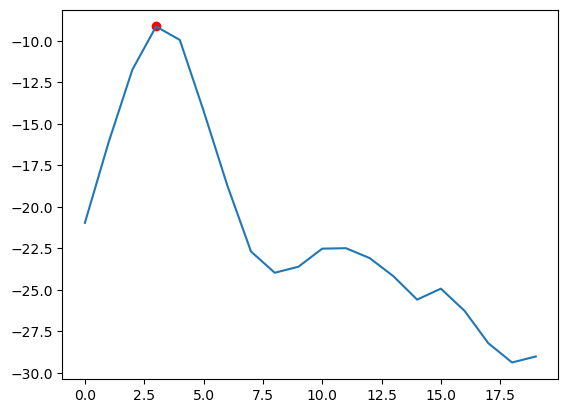

In [163]:
plt.plot(X_test[78])
plt.scatter(np.argmax(X_test[78]), max(X_test[78]), c='r')
print(prediction[78])

[4.328364e-10]


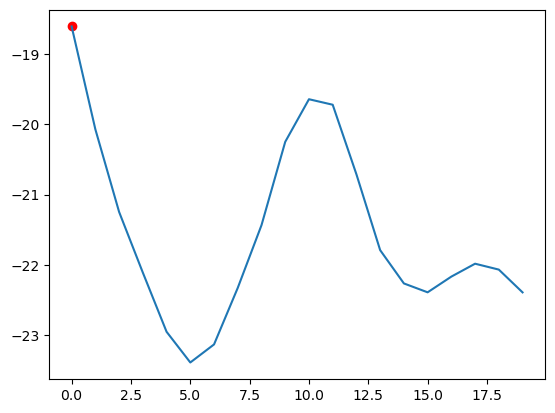

In [164]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [175]:
model.save("model.h5")